### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Tercera tarea programada 2022-I

### Parte 1 - ejercicio 1


Estudiantes: Juan Ignacio Navarro Navarro

## Nota:

Para correr los archivos se necesita descargar y descomprimir el dataset presentado en la sección 2 de este documento (la de la descripción de los datos utilizados en el ejercicio). Estos deben colocarse en la misma carpera en la que se encuentra el corriente cuaderno de Jupyter. De forma que se obtenga por ejemplo el siguiente orden de archivos con las imágenes de antílope.

-> animals/animals/antelope

-> Tarea3-Parte1

-> name of animals.txt

Igual para ver los resultados no se requiere hacer esto, es solo para correrlo sin problemas.

## Ejercicio 1

### 1) Descipción del problema y objetivo del ejercicio

El objetivo de este ejercicio es practicar la implementación de una CNN utilizando PyTorch para un conjunto de datos que funciona como modelo para la clasificación de animales.

En general como problema se tiene que el análisis de imágenes individualmente por una persona es sencillo si esta conoce todos los animales posibles pero tiene dos problemas. El primero es que si esta persona no conoce el animal no lo va a poder clasificar y el segundo es que una persona dura mucho en realizar esta acción. Es por esto que el desarrollo de una red neuronal convolucional es de gran utilidad porque podrá realizar el análisis de millones de imágenes en poco tiemop y hacer un reconocimiento casi inmediato para todas. La cantidad de aplicaciones que se pueden aprovechar de este rápido reconocimiento automaticado son muchas y pueden favorecer los trabajos simples en las investigaciones. 

### 2) Describa los datos utilizados en el ejercicio

Los datos utilizados en el ejercicio corresponden a los almacenados en el siguiente repositorio https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals?resource=download 

Estos datos corresponden a un total de 5400 imágenes de 90 animales distintos los cuales fueron clasificados en carpetas. Todas estas imágenes son útiles para entrenar el modelo que luego va a reconocer alguna imagen de estas o similar y la va a clasificar en porcentajes de la especie a la cuál pertenee.

### 3) Cargue, normalice y explore los datos

A continuación se importan las bilbiotecas necesarias para el análisis.

In [33]:
# Bibliotecas requeridas para el ejercicio

import numpy as np

# Para graficar
%matplotlib inline
import matplotlib.pyplot as plt

#Bibliotecas generales
import torch
import torchvision
import torchvision.transforms as transforms

# Redes neuronales
import torch.nn as nn
import torch.nn.functional as F

# Pérdida y optimización
import torch.optim as optim

# Calculo de metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

El siguiente paso es la carga y normalización de los datos

In [5]:
# Carga de los datos divididos en datos de entrenamiento y validación.

transform = transforms.Compose(
    [transforms.Resize(255),
     transforms.CenterCrop(224),
     transforms.ToTensor()])
     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Cargador de datos de entrenamiento.
#Se definen objetos (tipo DataLoader) para la carga de los datos 
#en mini batches ,
trainset = torchvision.datasets.ImageFolder('./animals/animals', transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=1350,
                                          shuffle=True, num_workers=2)

print(len(trainloader))
#Datos de prueba
testset = torchvision.datasets.ImageFolder('./animals/animals', transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                          shuffle=True, num_workers=2)

# Clases asociadas a las imágenes
classes =   ('antelope','badger','bat','bear','bee','beetle','bison','boar',
            'butterfly','cat','caterpillar','chimpanzee','cockroach','cow',
            'coyote','crab','crow','deer','dog','dolphin','donkey','dragonfly',
            'duck','eagle','elephant','flamingo','fly','fox','goat','goldfish',
            'goose','gorilla','grasshopper','hamster','hare','hedgehog','hippopotamus','hornbill','horse','hummingbird',
            'hyena','jellyfish','kangaroo','koala','ladybugs','leopard',
            'lion','lizard','lobster','mosquito',
            'moth','mouse', 'octopus', 'okapi','orangutan','otter','owl','ox','oyster',
            'panda', 'parrot','pelecaniformes','penguin','pig','pigeon',
            'porcupine','possum','raccoon','rat','reindeer','rhinoceros',
            'sandpiper','seahorse','seal','shark','sheep','snake','sparrow',
            'squid','squirrel','starfish','swan','tiger','turkey','turtle',
            'whale','wolf','wombat','woodpecker','zebra')


4


Exploración de los datos

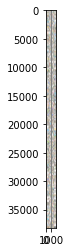

  fly  moth   fly okapi
torch.Size([3, 38196, 1810])


In [6]:
# Funciones para desplegar algunas imágenes de forma aleatoria. 

def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# obtener imágenes del conjunto de entrenamiento al azar
dataiter = iter(trainloader)
images, labels = dataiter.next()


# mostrar las imágenes
imshow(torchvision.utils.make_grid(images))

# mostrar las etiquetas

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

print(torchvision.utils.make_grid(images).shape)


### 4) Calcule algunas estadísticas importantes, por ejemplo cantidad de registros por clase para verificar si las clases están balanceadas

In [7]:
def registros_por_clase(labels):
    """
    Este método calcula la cantidad de imágenes que hay en
    cada clase para ver si están bien balanceadas
    """
    lista_registros = [0] * 90
    for label in labels:
        lista_registros[label]+=1
    print("Resumen de balance de registros:\n")
    for i in range(90):
        print("En la clase " + classes[i] + " hay ", lista_registros[i], " registros.")

registros_por_clase(labels)



Resumen de balance de registros:

En la clase antelope hay  15  registros.
En la clase badger hay  16  registros.
En la clase bat hay  19  registros.
En la clase bear hay  10  registros.
En la clase bee hay  16  registros.
En la clase beetle hay  13  registros.
En la clase bison hay  12  registros.
En la clase boar hay  14  registros.
En la clase butterfly hay  21  registros.
En la clase cat hay  18  registros.
En la clase caterpillar hay  12  registros.
En la clase chimpanzee hay  19  registros.
En la clase cockroach hay  13  registros.
En la clase cow hay  15  registros.
En la clase coyote hay  11  registros.
En la clase crab hay  13  registros.
En la clase crow hay  18  registros.
En la clase deer hay  14  registros.
En la clase dog hay  9  registros.
En la clase dolphin hay  13  registros.
En la clase donkey hay  18  registros.
En la clase dragonfly hay  14  registros.
En la clase duck hay  11  registros.
En la clase eagle hay  15  registros.
En la clase elephant hay  11  registros

### 5) Defina la red convolucional

In [8]:
# Crear el modelo de aprendizaje profundo, se crea una clase 
# que envuelve la clase nn.Module 
# Para profundizar en las entradas y salidas por capa consulte [4] y [8]

class CNNet(nn.Module):
    # Modelo de red convolucional.
    # :params
    #    torch.nn.Module clase que implenta la funionalidad de
    #    redes neuronales de Pytorch 

    def __init__(self): 
        # Función para definir e inicializar la red.
        super(CNNet, self).__init__()

        #capa convolucional
        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        self.conv1 = nn.Conv2d(3, 6, 5)

        #torch.nn.MaxPool2d(kernel_size, stride,...        
        self.pool = nn.MaxPool2d(2, 2)  

        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        #Capas perceptrón del modelo
        self.fc1 = nn.Linear(44944, 200)
        
        self.fc2 = nn.Linear(200, 110)
        
        #Salida a 10 clases 
        self.fc3 = nn.Linear(110, 90)

    def forward(self, x):
        # Aplica el modelo a los datos de entrada.
        # :param
        #   x : datos de la imagen a procesar.
        
        #Pase de la entrada por todas las capas de la red.
        #print("Tamaño del x de entrada al entrenamiento:" , x.shape)

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print("Tamaño de x luego de la convolución y pool:", x.shape)
        x = x.view(-1, 44944)
        #x = torch.flatten(x, 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = CNNet()

### 6) Defina los hiper-parámetros de entranamiento, por ejemplo, función de pérdida y el optimizador

Estos dos se definen a continuación

In [9]:
# Función de pérdida es de entropía cruzada
criterion = nn.CrossEntropyLoss()

# Optimización por descenso de gradiente estocástico (Stochastic Gradient Descent - SGD)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 7) Separe las muestras en datos de entrenamiento y validación y entrene el modelo

A continuación se presenta el entrenamiento de la red

In [10]:
# cantidad de ciclos de entrenamiento o épocas
numEpoch = 2

print("length")
print(len(trainloader))

for epoch in range(numEpoch):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # obtener los datos de entrada; 
        # data es una lista de la forma [inputs, labels]
        inputs, labels = data


        # inicializar los parámetros del gradiente.
        optimizer.zero_grad()

        # Se realizan las predicciones con el modelo. 
        # Este código ejecuta el forward de las entradas.
        outputs = net(inputs)
        
        # Se calcula la pérdida utilizando Cross Entropy Loss
        loss = criterion(outputs, labels)       
        loss.backward()
        
        #El optimizador realiza las actualizaciones a través del método step().
        optimizer.step()


        # imprimir estadisticas
        running_loss += loss.item()
        if i % 100 == 99:    # imprimir mensaje cada 2000 mini-batches
            print('[%d, %5d] pérdida: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Fin del entrenamiento')

length
4
Fin del entrenamiento


### 8) Evalúe el modelo resultante

Primero se realiza una prueba con datos reales, por ejemplo los siguientes

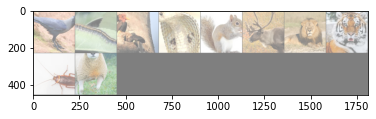

Etiqueta verdadera:   crow caterpillar hornbill snake squirrel reindeer  lion tiger cockroach sheep


In [28]:

dataiter = iter(testloader)
images, labels = dataiter.next()

# imprimir algunos ejemplos y la etiqueta original (la verdad)
imshow(torchvision.utils.make_grid(images))
print('Etiqueta verdadera: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

Ahora se hace una prueba con esos mismo ejemplos

In [29]:
outputs = net(images)
print(outputs.shape)


# esta salida tiene las 10 neuronas que representan las 10 clases involucradas en la clasificación

_, predicted = torch.min(abs(outputs), 1)

print('Predicción: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))

torch.Size([10, 90])
Predicción:    rat dragonfly raccoon raccoon   rat raccoon snake snake snake rhinoceros


Note que la predicción se puede comparar con lo indicado en la descripción original

A continuación se va a calcular la presición del modelo:

In [31]:
# Se toma todos los datos de prueba y se verifica si el modelo realiza
# bien la predicción para cada uno. 

#Cantidad de imágenes clasificadas correctamente.
correct = 0

#Imágenes totales
total = 0

with torch.no_grad():
    for data in testloader:
        # Datos de las imágenes y etiquetas
        images, labels = data
        
        # Forward de las imágenes en el modelo.
        outputs = net(images)
        
        # Clase a la que pertece cada imagen
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Exactitud de la red en las 1350 imágenes de entrenamiento y las 10 de prueba: %d %%' % (
    100 * correct / total))

Exactitud de la red en las 1350 imágenes de entrenamiento y las 10 de prueba: 1 %


Como parte del cálculo de las estadísticas se muestra los resultados por cada clase

In [45]:
# Se toma todos los datos de prueba y se verifica si el modelo realiza
# bien la predicción para cada una de las 10 clases individuales. 

# Cantidad de imágenes correctamente clasificadas por clase
class_correct = list(0. for i in range(90))

# Cantidad de imágenes por clase.
class_total = list(0. for i in range(90))

#Para todas las imágenes de prueba se realiza el forward
# y se evalúa si el resultado fue el correcto y la clase 
# a la que pertenece la imagen.
with torch.no_grad():
    for data in testloader:
        #Se dividen las imágenes de las etiquetas.
        images, labels = data
        
        #Se clasificacn las imágenes usando el modelo.
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        #Se compara el resultado de la predicción con el 
        # valor esperado y se cuentan los casos exitosos por clase.
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# Se imprime el resultado
for i in range(10):
    print('Exactitud en %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Exactitud en antelope :  0 %
Exactitud en badger :  0 %
Exactitud en   bat :  0 %
Exactitud en  bear :  0 %
Exactitud en   bee :  0 %
Exactitud en beetle :  0 %
Exactitud en bison :  0 %
Exactitud en  boar :  0 %
Exactitud en butterfly :  0 %
Exactitud en   cat :  0 %


### 8) Evalue métricas en con los resultados

A continuación se muestran las métricas de exactitud, precisión recall y F1 (todos los resultados se muestran por medio de prints)

In [44]:
# Matriz de confusión:
# Como entrada se toman las listas que contienen los valores predecidos por el
# modelo en la variable 'pred' y en la variable 'y' los valores esperados por
# el modelo

# la bilbioteca skilearn contiene los siguientes métodos para realizar los cáculos
# métricas extraidas del modelo

# Como esta matriz corresponde a una formada por varias clases el valor que se representa
# en cada elemento son los casos que funcionaron, por ejemplo en la posición 3, 3 se muestran
# la cantidad de valores 3 que tuvieron un valor predecido igual a 3

print("MATRIZ DE CONFUSION")
confusion = confusion_matrix(labels, predicted)
print("\t",classes[labels[0]],"\t",classes[labels[1]],"\t",classes[labels[2]],"\t",classes[labels[3]],"\t",classes[labels[4]],"\t",classes[labels[5]],"\t",classes[labels[6]],"\t",classes[labels[7]],"\t",classes[labels[8]],"\t",classes[labels[9]],"\t")
for i in range(11):
    texto = ""
    for j in range(11):
        texto += str(confusion[i][j]) + "\t\t"

    print(classes[i+1], "\t\t", texto)

# Exactitud: la proporciónd e prediccones que el modelo clasificó correctamente

print("\nEXACTITUD: la proporción de prediccones que el modelo clasificó correctamente en el total de clases del modelo")
print(accuracy_score(labels, predicted))

# Precisión: porcentaje de los identificadores positivos que fueron recuperados
print("\nPRECISIÓN: Proporción de instancias correctas entre las recuperadas solamente considerando las positivas")

presicion = precision_score(labels, predicted, average=None, zero_division=True)

for i in range(11):
    print("precisión en la clase ", i+1, " es ", presicion[i])


# Exhausitividad: proporción de positivos que se identificó correctamente
print("\nEXHAUSTIVIDAD: proporción de positivos que se identificó correctamente")

exhaustividad = recall_score(labels, predicted, average= None)

for i in range(11):
    print("exhaustividad en la clase ", i+1, " es ", exhaustividad[i])


# F1: equilibrio entra la precisión y el recall
print("\nF1: equilibrio entre la precisión y el recall")

f1= f1_score(labels, predicted, average=None)

for i in range(11):
    print("f1 en la clase ", i+1, " es ", f1[i])

MATRIZ DE CONFUSION
	 snake 	 horse 	 bee 	 squid 	 rhinoceros 	 gorilla 	 boar 	 rat 	 pig 	 sparrow 	
badger 		 0		0		0		1		0		0		0		0		0		0		0		
bat 		 0		0		0		1		0		0		0		0		0		0		0		
bear 		 0		0		0		1		0		0		0		0		0		0		0		
bee 		 0		0		0		0		0		0		0		0		0		0		0		
beetle 		 0		0		0		1		0		0		0		0		0		0		0		
bison 		 0		0		0		1		0		0		0		0		0		0		0		
boar 		 0		0		0		1		0		0		0		0		0		0		0		
butterfly 		 0		0		0		1		0		0		0		0		0		0		0		
cat 		 0		0		0		1		0		0		0		0		0		0		0		
caterpillar 		 0		0		0		1		0		0		0		0		0		0		0		
chimpanzee 		 0		0		0		1		0		0		0		0		0		0		0		

EXACTITUD: la proporción de prediccones que el modelo clasificó correctamente en el total de clases del modelo
0.0

PRECISIÓN: Proporción de instancias correctas entre las recuperadas solamente considerando las positivas
precisión en la clase  1  es  1.0
precisión en la clase  2  es  1.0
precisión en la clase  3  es  1.0
precisión en la clase  4  es  0.0
precisión en la clase  5  es  1.0
precisión en la clase 

c:\Users\juan navarro\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 10) Analice los resultados

Note que los resultados no se acercan a lo esperado, en general nadie confiaría un modelo con estadísticas tan bajas. Para mejorar el modelo se tiene la opción de que este analice más muestras y que no se quede con la pequeña parte que se definió desde un principio. La razón de por qué no se hizo esto es por que la cantidad de datos a analizar es grande y la generación del modelo estaba tardando tanto en mi computadora que la aplicación se caía. Si se cuenta con una computadora más potente se podría llegar a tener un modelo lo suficientemente robusto para este dataset o alguno de más clases inclusive. Además cada una de las imágenes al ser de tanta calidad necesitaba un análisis de muchos pixeles por lo que hace el proceso más lento para una computadora personal.

Otro cambio que puede mejorar el rendimiento de la red es en la definición de la red convolucional (clase CNNet) se pueden considerar más capas para que el análisis pase por más etapas de análisis  así mejorar las predicciones que este mismo puede tener. Igual, esto no se aplicó por la limitación mencionada anteriormente, aunque sí se intentó.

Una posible solución que haría el ejercicio un poco más atractivo es borrarle imágenes al modelo, ya que este tiene tantas clases eso es posible que hiciera que se necesitara un procesamiento muy alto.

### 11) Conclusiones

- Las redes neuronales convolucionales permiten mejorar la efectividad de los perceptrones multicapa por medio de un análisis por partes de la entrada y no al realizar un análisis de todo de golpe.

- Estas redes son útiles para el reconocimiento de patrones y entrenamiento de modelos de reconocimiento en imágenes, ya que las imágenes poseen una gran cantidad de datos que pueden durar mucho tiempo en un análisis de perceptrón multicapa normal.

- Un modelo de tamaño mediano como el analizado en este ejemplo necesita que se le realice un análisis más completo que el realizado para dar una mejor predicción. Como se trata de 90 capas muchas de estas no llegaron a analizarse correctamente con la parte de los datos iniciales que se realizó el análisis.

- Con una computadora más potente se puede entrenar el modelo con todos los datos que brinda el repositorio utilizado e incluso se podrían tomar imágenes externas a este para ser analizadas por medio de este modelo.

- La alta calidad de las imágenes en el repositorio generó que el análisis se limitara a pocas imágenes porque la cantidad de procesamiento era bastante alta para una computadora personal como la mía.

## Referencias

Mora, María (2022) "Redes Neuronales Convolucionales". Instituto Tecnológico de Costa Rica. I Semestre 2022.

Lei, L (2019) "Intro-to-Pytorch: Loading Image Data". Disponible en: https://www.kaggle.com/code/leifuer/intro-to-pytorch-loading-image-data/notebook

Issaev, S. (2020) "Beginner's Guide to Loading Image Data with Pytorch". Disponible en: https://towardsdatascience.com/beginners-guide-to-loading-image-data-with-pytorch-289c60b7afec
